In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time, sys
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
from common_functions import target_info

In [3]:
# EMC slope and Error
emc_ratios = {
    "Ni64": [0.3425, 0.0112],
    "Ni58": [0.3404, 0.0112],
    "Ti48": [0.3316, 0.0116],
    "Al27": [0.2796, 0.0118],
    "Ag108": [0.3750, 0.0107],
    "Au197": [0.3770, 0.0104],
    "C12": [0.2369, 0.0095],
    "Cu63": [0.3369, 0.0102],
    "Fe54": [0.3355, 0.0111],
    "Be9": [], # The calculated slope is too high. Need to check my work
    "Ca40": [],
    "Ca48": [0.2908, 0.0098],
    "B10": [0.2050, 0.0110],
    "B11": [],
    "Th232": [0.3500, 0.0115]
}

target_info ={
 'Be9': [4, 9, 0.986],
 'B10': [5, 10, 0.21], #Bullshit length
 'B11': [5, 11, 0.34], #Bullshit length
 'C12': [6, 12, 0.574],
 'Ca40': [20, 40, 0.785],
 'Ca48': [20, 48, 1.051],
 'Ti48': [22, 48, 0.294],
 'Fe54': [26, 54, 0.367],
 'Ni58': [28, 58, 0.2408],
 'Ni64': [28, 64, 0.2607],
 'Ag108': [47, 108, 0.528],
 'Sn119': [50, 119, 0.4562],
 'Th232': [90, 232, 0.409],
 'Li6': [3, 6, 0.225],
 'Li7': [3, 7, 0.254],
 'Al27': [13, 27, 0.46],
 'Cu63': [29, 63, 0.942],
 'Au197': [79, 197, 0.4047],
 'LH2': [1, 1, 0.7247],
 'LD2': [1, 2, 1.6698],
 'He3': [2, 3, 0.4099],
 'He4': [2, 4, 1.2927]
}

# Plot your EMC ratios with world data

([<matplotlib.axis.XTick at 0x10ff3b520>,
 [Text(2.154434690031884, 0, '10'),
  Text(2.5615694875280033, 0, '16'),
  Text(2.968704285024123, 0, '26'),
  Text(3.375839082520243, 0, '38'),
  Text(3.7829738800163626, 0, '54'),
  Text(4.190108677512482, 0, '73'),
  Text(4.597243475008602, 0, '97'),
  Text(5.004378272504722, 0, '125'),
  Text(5.411513070000842, 0, '158'),
  Text(5.818647867496961, 0, '196')])

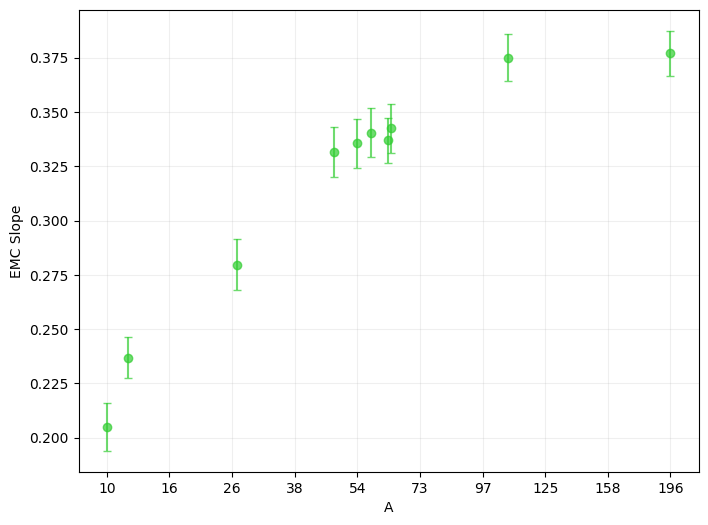

In [12]:
# Prepare the data for plotting
x_values = []
y_values = []
y_errors = []

for key in emc_ratios:
    if key in target_info and emc_ratios[key]:
        x_values.append(target_info[key][1])  # 3rd value from target_info
        y_values.append(emc_ratios[key][0])  # 1st value from emc_ratios
        y_errors.append(emc_ratios[key][1])  # 2nd value from emc_ratios

# Plotting
plt.figure(figsize=(8, 6))
xcu_values = np.cbrt(x_values)
plt.errorbar(xcu_values, y_values, yerr=y_errors, fmt = 'o', alpha = 0.7, color = 'limegreen', capsize = 3, label = 'XEM2')
plt.xlabel(r'A')
plt.ylabel('EMC Slope')
plt.grid(True, alpha = 0.2)
x_ticks = np.linspace(np.min(xcu_values), np.max(xcu_values), len(xcu_values))  # Adjust number of ticks if necessary
new_labels = [f'{int(tick**3)}' for tick in x_ticks]  # Inverse transform (cube to get back to original scale)
plt.xticks(x_ticks, new_labels)  # Set new labels
# plt.savefig(f'Plots/emc_comparison_{time.time():.0f}.pdf')

In [5]:
y2 = [0.195, 0.233]
x2 = [10, 12]
y3 = [0.337]
x3 = [40]
y2err = [0.025, 0.025]
y3err = [0.04]
ax9.errorbar(x2, y2, yerr = y2err, fmt = 's', alpha = 0.7, color = 'blue', capsize = 3, label = 'JLab 12 GeV Boron Paper')
ax9.errorbar(x3, y3, yerr = y3err, fmt = '^', alpha = 0.3, color = 'red', capsize = 3, label = 'SLAC')

NameError: name 'ax9' is not defined

In [14]:
!pip install sympy

Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [16]:
from sympy import symbols, cos, sin, sqrt, diff, Matrix
from sympy import det

# Define variables
xptar, yptar, theta_spec = symbols('xptar yptar theta_spec')
p = symbols('p', real=True, positive=True)

# Expressions
pz_spec = p/sqrt(1 + xptar**2 + yptar**2)
pz_lab = pz_spec * (cos(theta_spec) - yptar*sin(theta_spec))
cos_theta = pz_lab/p

# Phi
tan_phi = (yptar*cos(theta_spec) + sin(theta_spec))/xptar

# Jacobian matrix
J = Matrix([[cos_theta, tan_phi]]).jacobian(Matrix([xptar, yptar]))

# Print the Jacobian
print("Jacobian Matrix:")
print(J)
determinant = det(J)
print("Determinant of the Jacobian Matrix:")
print(determinant)


Jacobian Matrix:
Matrix([[-xptar*(-yptar*sin(theta_spec) + cos(theta_spec))/(xptar**2 + yptar**2 + 1)**(3/2), -yptar*(-yptar*sin(theta_spec) + cos(theta_spec))/(xptar**2 + yptar**2 + 1)**(3/2) - sin(theta_spec)/sqrt(xptar**2 + yptar**2 + 1)], [-(yptar*cos(theta_spec) + sin(theta_spec))/xptar**2, cos(theta_spec)/xptar]])
Determinant of the Jacobian Matrix:
(-xptar**2*sin(theta_spec)**2 - xptar**2*cos(theta_spec)**2 - yptar**2*cos(theta_spec)**2 - 2*yptar*sin(theta_spec)*cos(theta_spec) - sin(theta_spec)**2)/(xptar**4*sqrt(xptar**2 + yptar**2 + 1) + xptar**2*yptar**2*sqrt(xptar**2 + yptar**2 + 1) + xptar**2*sqrt(xptar**2 + yptar**2 + 1))
